In [1]:
from matplotlib import pyplot as plt
import librosa
import librosa.display
import librosa.feature
import numpy as np

In [2]:
audio_list = {
    'happy': ['0102', '0104', '0107'],
    'neutral': ['0103', '0107', '0110'],
    'sad': ['0104', '0106', '0109']
}

audio_paths = {}
for key, values in audio_list.items():
    audio_paths[key] = [f'SpeechEmotion/{key}/{key}-{value}.wav' for value in values]

In [3]:
from IPython.display import Audio

for key, values in audio_paths.items():
    print(key.upper())
    for value in values:
        display(Audio(value))

HAPPY


NEUTRAL


SAD


In [4]:
audio_librosa = {}
for key, values in audio_paths.items():
    audio_librosa[key] = []
    for value in values:
        y, sr = librosa.load(value)
        audio_librosa[key].append((y, sr))

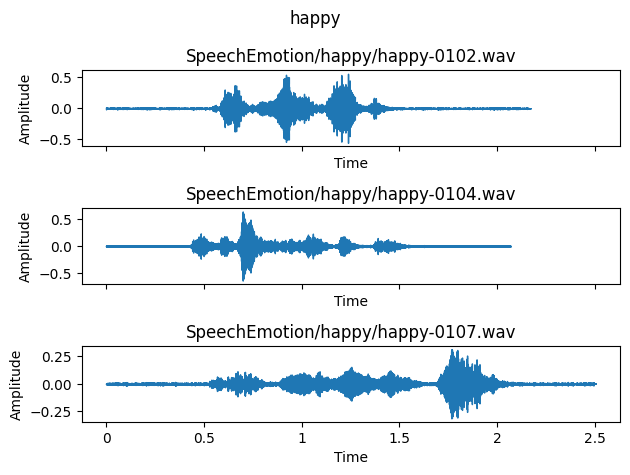

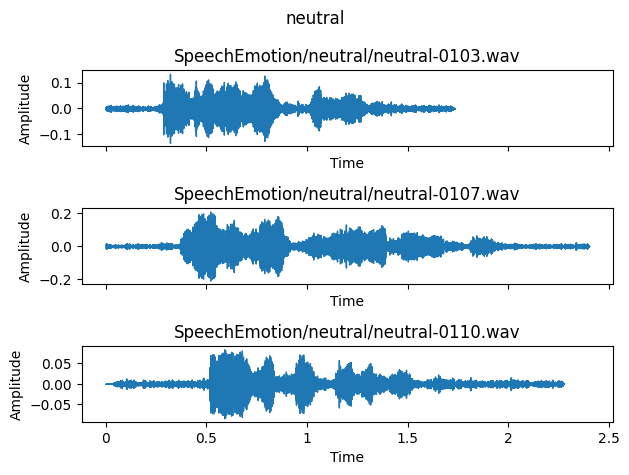

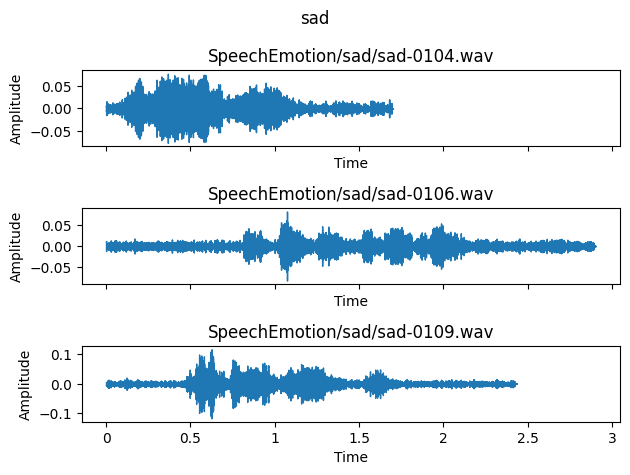

In [5]:
def diplay_amplitude_time(emotion, waves):
    fig, ax = plt.subplots(nrows = len(waves), ncols = 1, sharex = True)
    fig.suptitle(emotion)
    for i, wave in enumerate(waves):
        ax[i].set_ylabel('Amplitude')
        ax[i].set_title(audio_paths[emotion][i])
        librosa.display.waveshow(y = wave[0], sr = wave[1], ax = ax[i])
    fig.tight_layout()
    
for key, values in audio_librosa.items():
    diplay_amplitude_time(key, values)

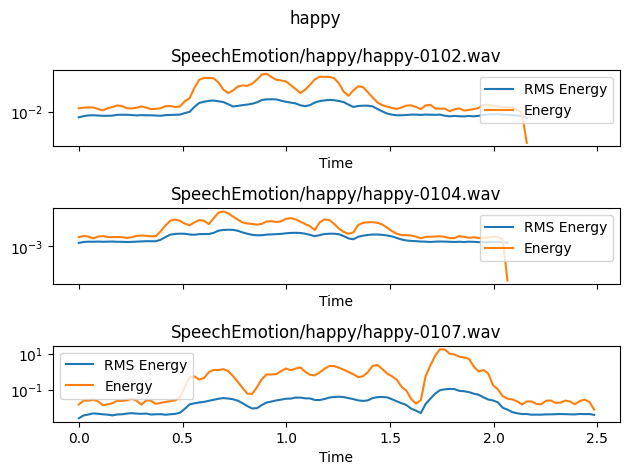

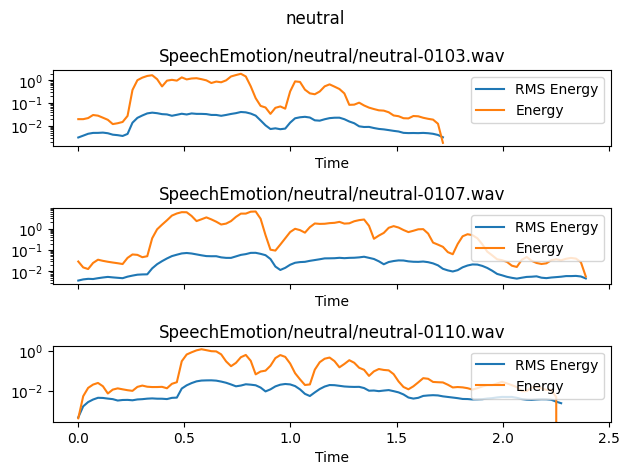

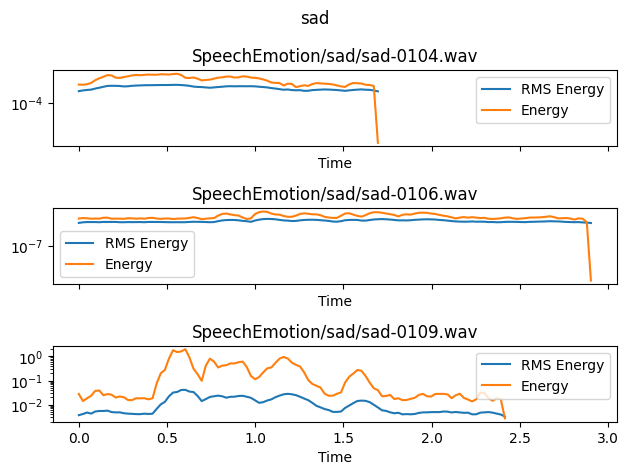

In [6]:
def energy(wave):
    hop_length = 512
    frame_length = hop_length * 2

    energy = np.array([
            sum(abs(wave[j:j + frame_length] ** 2))
            for j in range(0, len(wave), hop_length)
        ])
    return energy

def rms_energy(wave):
    rms = librosa.feature.rms(y = wave)
    return rms

def display_energy(emotion, waves):
    fig, ax = plt.subplots(nrows = len(waves), ncols = 1, sharex = True)
    fig.suptitle(emotion)
    for i, wave in enumerate(waves):
        ax[i].set_title(audio_paths[emotion][i])

        e = energy(wave[0])
        rmse = rms_energy(wave[0])
        times = librosa.times_like(rmse)

        ax[i].semilogy(times, rmse[0], label = 'RMS Energy')
        ax[i].semilogy(times, e, label = 'Energy')
        ax[i].legend()
        ax[i].set_xlabel('Time')
        
    fig.tight_layout()

for key, values in audio_librosa.items():
    display_energy(key, values)

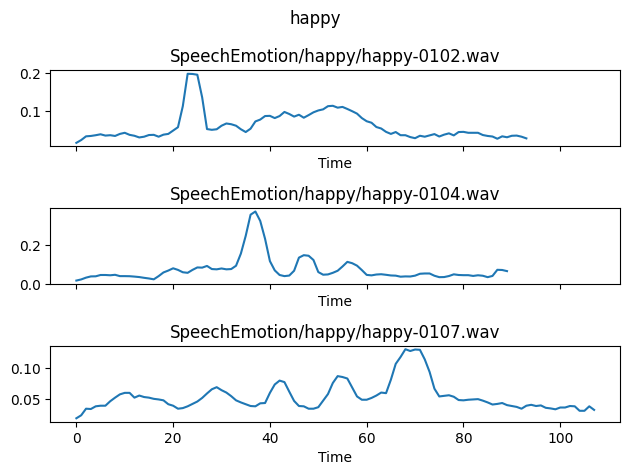

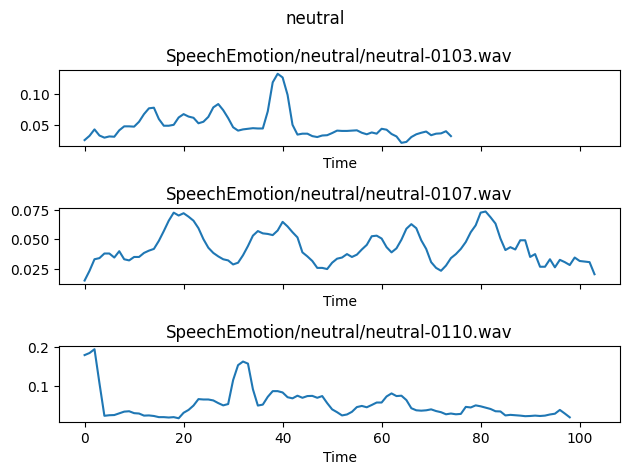

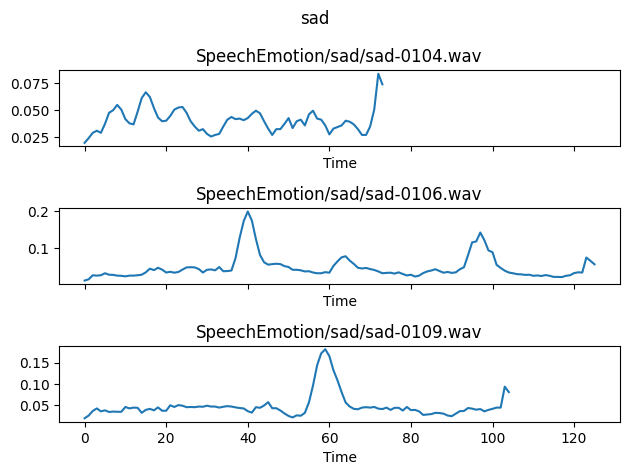

In [7]:
def zero_crossing_rate(wave):
    zcr = librosa.feature.zero_crossing_rate(wave)
    return zcr

def display_zcr(emotion, waves):
    fig, ax = plt.subplots(nrows = len(waves), ncols = 1, sharex = True)
    fig.suptitle(emotion)
    for i, wave in enumerate(waves):
        ax[i].set_title(audio_paths[emotion][i])

        zcr = zero_crossing_rate(wave[0])[0]

        ax[i].plot(zcr)
        ax[i].set_xlabel('Time')
    fig.tight_layout()

for key, values in audio_librosa.items():
    display_zcr(key, values)

2.5025396825396826


2.5025396825396826

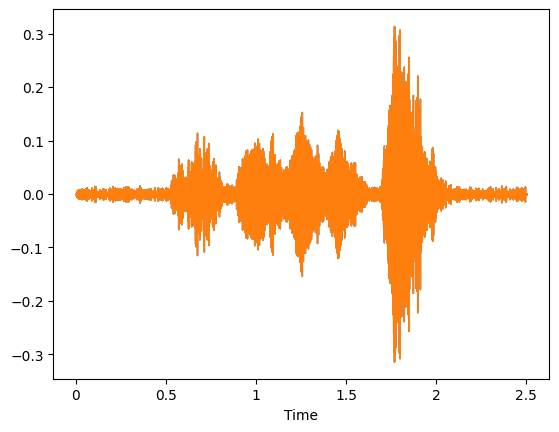

In [26]:
def silence_ratio(wave):
    yt, index = librosa.effects.trim(wave)
    librosa.display.waveshow(yt)
    print(librosa.get_duration(y=yt))

silence_ratio(audio_librosa['happy'][2][0])
librosa.display.waveshow(audio_librosa['happy'][2][0])

librosa.get_duration(y=audio_librosa['happy'][2][0])